In [318]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [319]:
df = pd.read_csv("time_messagees.txt", delimiter=",", header = None) # считаем файл, учитывая разделитель
df = df.rename(columns = {0: "time", 1: "count_mes"}) # задаем столбцам имена
df.head(5)

,time,count_mes
0,00:00:00,0.0
1,00:00:01,1.0
2,00:00:02,0.0
3,00:00:03,6.0
4,00:00:04,7.0


In [320]:
def time_to_seconds(time): # функция преобразует строковое значение времени в общее количество секунд
    time_number = time.split(":") # разделение строки
    hours = int(time_number[0]) # преобразование каждой части строки в int
    minutes = int(time_number[1])
    seconds = int(time_number[2])
    total_seconds = hours * 3600 + minutes * 60 + seconds # получение общего кол-ва секунд
    return total_seconds
df['total_seconds'] = df['time'].apply(time_to_seconds) # новый столбец с названием total_seconds

df["count_mes"] = df["count_mes"].astype(int) # меняем тип данных count_mes, так как количество сообщений не может быть не целым 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86396 entries, 0 to 86395
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   time           86396 non-null  object
 1   count_mes      86396 non-null  int32 
 2   total_seconds  86396 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.6+ MB


In [321]:
x = df['total_seconds'] # создание двух массивов
y = df['count_mes']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(np.array(x).reshape(-1,1)) # стандартизация числовых значений
y_scaled = scaler.fit_transform(np.array(y).reshape(-1,1))

# разделение данных на обучающий и проверочный наборы 
x_train,x_valid,y_train,y_valid = train_test_split(x_scaled,y_scaled, test_size=0.25, random_state=0)

model = LinearRegression() # создание объекта модели линейной регрессии
model.fit(x_train, y_train) # обучение модели

predictions_valid = model.predict(x_valid) # выполнение предсказания

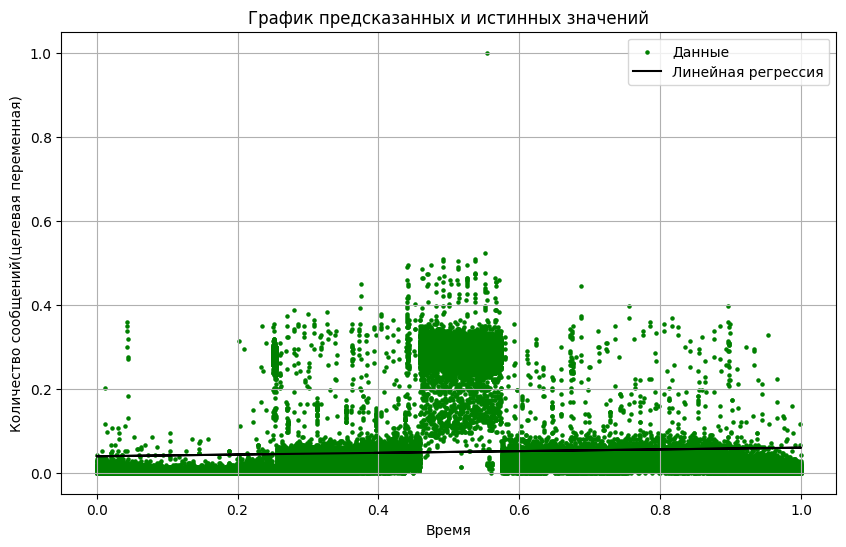

In [322]:
plt.figure(figsize=(10, 6)) # создание графика
plt.scatter(x_scaled, y_scaled, c='g', s = 5, label = 'Данные') # создание точечного графика
plt.plot(x_valid,predictions_valid,'black', label = 'Линейная регрессия') # создание линейного графика

plt.xlabel('Время')
plt.ylabel('Количество сообщений(целевая переменная)')
plt.legend()
plt.title('График предсказанных и истинных значений')
plt.grid()
plt.show()

# Интерпретация графика
Модель хорошо справляется с предсказыванием значений, на нее не влияют выбросы, подъемы и спады количества сообщений. По графику видно, что количество сообщений линейно возрастает со временем.

In [323]:
# вывод метрик качества для оценки качества предсказаний модели линейной регрессии
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions_valid))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions_valid))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)))
print('R2 metric:', metrics.r2_score(y_valid, predictions_valid))

Mean Absolute Error: 0.05899835797573737
Mean Squared Error: 0.00801630634994638
Root Mean Squared Error: 0.08953382796433078
R2 metric: 0.004781562169811071


# Интерпретация значений метрик качества
* Значения MAE, MSE и RMSE соответственно равны 0.05, 0.008 и 0.08, что означает, что прогнозы достаточно точны, так как чем меньше значение этих метрик, тем более точны прогнозы
* Модель достаточно хорошо соответствует данным и объясняет 0.0047% дисперсии данных
В целом, эти значения указывают на достаточно большую точность модели при предсказании данных.